In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from skimage import transform, util
# Import local modules
import ca
%load_ext autoreload
%autoreload 2

## Make random grids

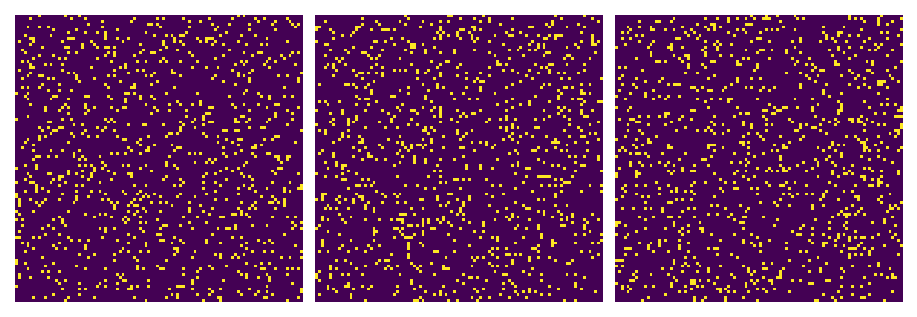

In [3]:
# Make a list to hold all our grids
grid_list = []
fig, axes = plt.subplots(
    nrows=1, ncols=3, dpi=150, constrained_layout=True)
for i in range(3):
    # grid = np.zeros((100, 100))
    # grid = np.random.randint(0, high=2, size=(100, 100))
    grid = np.random.choice(
        [0, 255], p=[0.9, 0.1], size=(100, 100)).astype(np.ubyte)
    grid_list.append(grid)
    axes[i].imshow(grid, cmap='viridis', interpolation='nearest')
    axes[i].set_axis_off()
plt.show()

## Load an image and downscale it

Unique values found in image:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Unique values after filtering:
[  0. 255.]


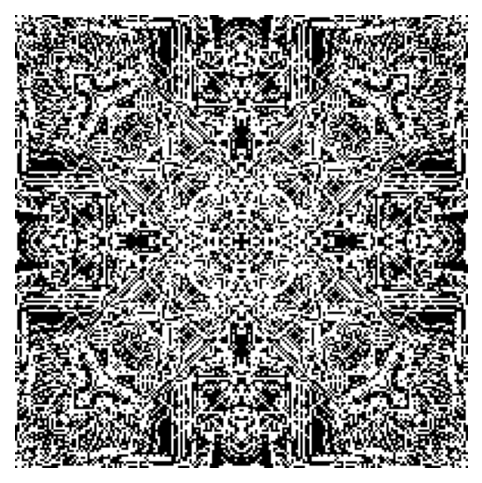

In [4]:
init_path = Path('Pattern_13.bmp')
if not init_path.exists():
    raise ValueError(f'File not found: {init_path}')
# Make a list to hold all our grids
grid = iio.imread(init_path).astype(np.ubyte)
# If image has more than one channel (RGB), take first channel only
if len(grid.shape) == 3:
    grid = grid[:, :, 0]
print('Unique values found in image:')
print(np.unique(grid))
# Downscale image by factor of 0.25
grid = transform.rescale(grid, 0.25, anti_aliasing=False)
# Convert all nonzero values to 255 (on)
grid[grid != 0] = 255
print('Unique values after filtering:')
print(np.unique(grid))
# Plot image
fig, ax = plt.subplots(dpi=150)
ax.imshow(grid, cmap='gray', interpolation=None)
ax.axis('off')
plt.show()

## Load a full image

[  0 255]


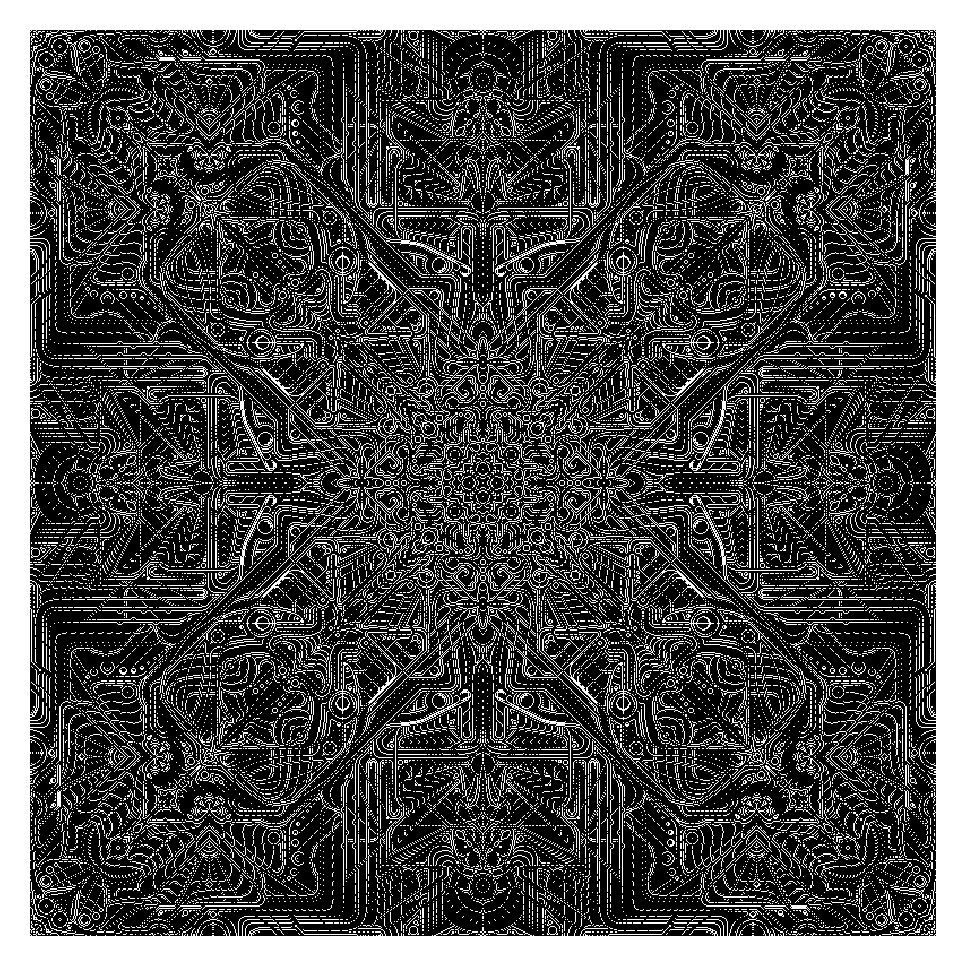

In [5]:
init_path = Path('Pattern_13.bmp')
grid = iio.imread(init_path).astype(np.ubyte)
if len(grid.shape) == 3:
    grid = grid[:, :, 0]
grid[grid != 0] = 255
print(np.unique(grid))
fig, ax = plt.subplots(dpi=300)
ax.imshow(grid, cmap='gray', interpolation='nearest')
ax.axis('off')
plt.show()

# Apply Game of Life rules

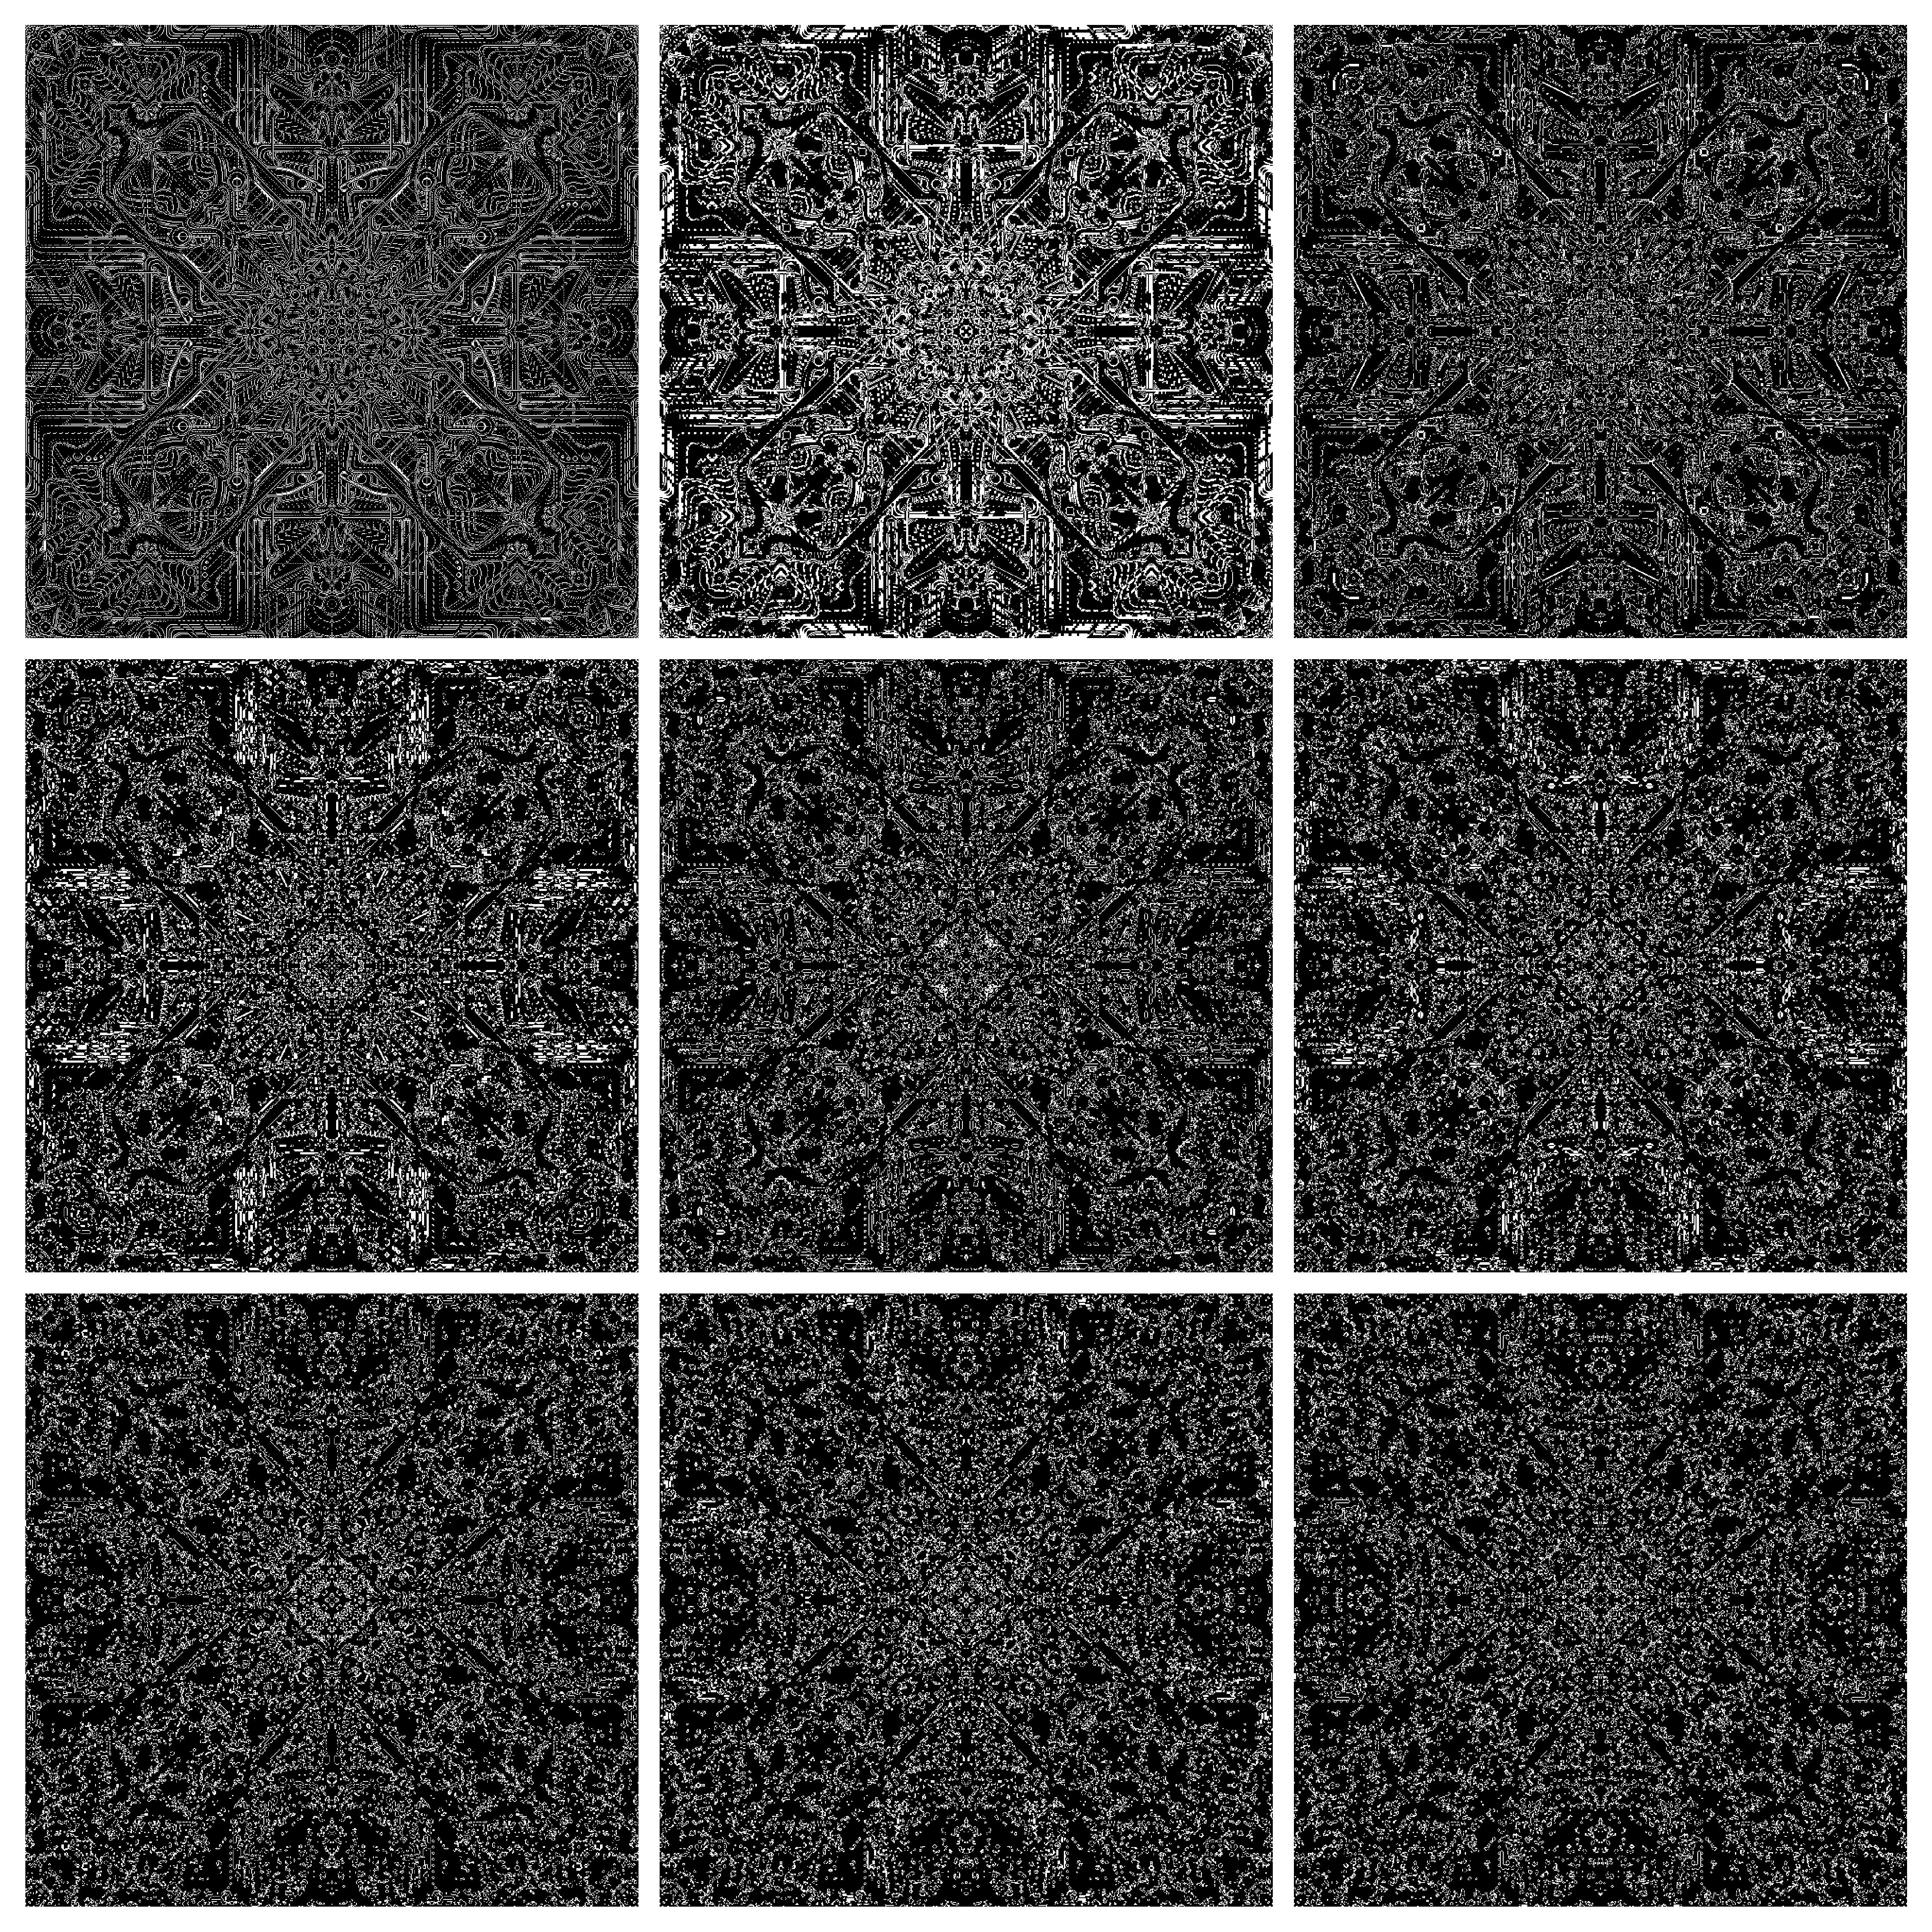

In [6]:
init_path = Path('Pattern_13.bmp')
save_dir_path = Path('results/Pattern_13')
save_dir_path.mkdir(exist_ok=True)
save = False
n_frames = 9
if not init_path.exists():
    raise ValueError(f'File not found: {init_path}')
# Make a list to hold all our grids
grid_list = []
for i in range(n_frames):
    if i == 0:
        # Load image as grid for first iteration
        grid = iio.imread(init_path).astype(np.ubyte)
        if len(grid.shape) == 3:
            grid = grid[:, :, 0]
        grid[grid != 0] = 255
    else:
        # update grid with grid returned after applying rules
        grid = ca.update_grid(grid_list[i - 1])
    grid_list.append(grid)
    if save:
        n_digits_total_frames = len(str(n_frames))
        save_path = Path(save_dir_path) / (
            f'frame_{str(i).zfill(n_digits_total_frames)}.png'
        )
        iio.imwrite(save_path, grid)
fig, axes = ca.plot_images(grid_list, imgs_per_row=3, cmap='gray', dpi=600)
plt.show()

In [7]:

init_path = Path('Pattern_13.bmp')
init_path.suffix

'.bmp'

In [10]:
n_frames = 100
init_path = Path('Pattern_13.bmp')
save_dir_path = Path('results/Pattern_13')
save = True
if save:
    save_dir_path.mkdir(exist_ok=True)
if not init_path.exists():
    raise ValueError(f'File not found: {init_path}')
# Make a list to hold all our grids
grid_list = []
for i in range(n_frames):
    if i == 0:
        # Load image as grid for first iteration
        grid = iio.imread(init_path).astype(np.ubyte)
        if len(grid.shape) == 3:
            grid = grid[:, :, 0]
        grid[grid != 0] = 255
    else:
        # update grid with grid returned after applying rules
        grid = ca.update_grid(grid_list[i - 1])
    grid_list.append(grid)
    if save:
        n_digits_total_frames = len(str(n_frames))
        save_path = Path(save_dir_path) / (
            f'frame_{str(i).zfill(n_digits_total_frames)}.png'
        )
        iio.imwrite(save_path, grid)
if save:
    n_saved = len([p for p in save_dir_path.glob(f'*{save_path.suffix}')])
    print(f'{n_saved} file(s) saved to:', save_dir_path.resolve())

125 file(s) saved to: C:\Users\gusb\projects\template-ca\results\Pattern_13
